In [1]:
import numpy as np
import matplotlib.pyplot as plt
from regions import Regions
import regions
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from smart_plotters.jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
#from smart_plotters.cutout_plot import get_cutout_405, get_cutout_jwst_ice


# Readying Sample

In [2]:
cat_use = make_cat_use()


In [3]:
mask_nonan = np.isfinite(cat_use.color('f182m', 'f212n')) & np.isfinite(cat_use.color('f182m', 'f410m')) & np.isfinite(cat_use.color('f405n', 'f466n')) & np.isfinite(cat_use.band('f187n')) & np.isfinite(cat_use.band('f182m')) & np.isfinite(cat_use.band('f212n')) & np.isfinite(cat_use.band('f405n')) & np.isfinite(cat_use.band('f410m')) & np.isfinite(cat_use.band('f466n'))
cat_nonan = JWSTCatalog(cat_use.catalog[mask_nonan])

cat_samp_columns = ['ra', 'dec', 'f187n', 'f182m', 'f212n', 'f405n', 'f410m', 'f466n', 'f182m-f212n', 'f182m-f410m', 'f405n-f466n']
cat_samp_columns_nopos = ['f187n', 'f182m', 'f212n', 'f405n', 'f410m', 'f466n', 'f182m-f212n', 'f182m-f410m', 'f405n-f466n']
cat_samp = np.array([cat_nonan.ra, cat_nonan.dec, cat_nonan.band('f187n'), cat_nonan.band('f182m'), cat_nonan.band('f212n'), cat_nonan.band('f405n'), cat_nonan.band('f410m'), cat_nonan.band('f466n'), cat_nonan.color('f182m', 'f212n'), cat_nonan.color('f182m', 'f410m'), cat_nonan.color('f405n', 'f466n')]).T
#cat_samp.shape
cat_samp_nopos = np.array([cat_nonan.band('f187n'), cat_nonan.band('f182m'), cat_nonan.band('f212n'), cat_nonan.band('f405n'), cat_nonan.band('f410m'), cat_nonan.band('f466n'), cat_nonan.color('f182m', 'f212n'), cat_nonan.color('f182m', 'f410m'), cat_nonan.color('f405n', 'f466n')]).T
cat_samp_nopos.shape

(34519, 9)

(0.0, 3.0)

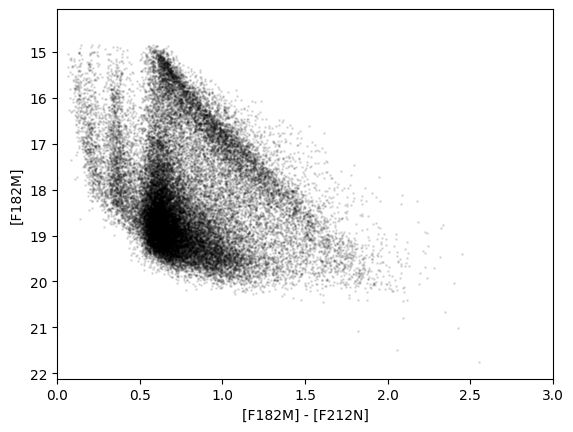

In [ ]:
cat_nonan.plot_CMD('f182m', 'f212n', 'f182m', s=1, color='k', alpha=0.1)
plt.xlim(0, 3)

# KMeans

In [5]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

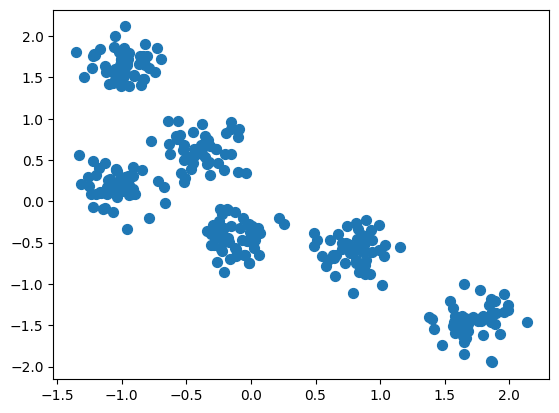

In [6]:
X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

In [7]:
X.shape

(300, 2)

In [8]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on the inertia
model = KMeans(n_clusters=6, n_init = 10)

In [9]:
labels = model.fit_predict(X)
labels

array([0, 1, 3, 3, 4, 0, 3, 5, 0, 3, 1, 1, 5, 2, 0, 5, 5, 1, 4, 2, 1, 2,
       5, 3, 2, 5, 0, 4, 2, 2, 0, 1, 5, 1, 4, 3, 4, 3, 2, 4, 5, 2, 5, 4,
       1, 1, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 4, 4, 2, 3, 1,
       3, 1, 2, 0, 0, 2, 4, 2, 1, 3, 4, 3, 2, 5, 1, 3, 0, 5, 1, 1, 2, 4,
       1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 4, 5, 3, 1, 5, 0, 0, 4, 2, 0, 5,
       2, 4, 4, 2, 5, 2, 3, 4, 4, 4, 5, 3, 2, 4, 4, 3, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 2, 0, 4, 1, 3, 2, 1, 5, 1, 1, 3, 5, 3, 5, 2, 3,
       5, 1, 3, 2, 5, 1, 5, 0, 3, 1, 3, 0, 5, 3, 5, 5, 0, 4, 2, 3, 5, 4,
       4, 5, 1, 0, 5, 3, 2, 0, 0, 5, 2, 4, 5, 2, 3, 4, 5, 5, 5, 0, 1, 2,
       5, 1, 5, 4, 2, 2, 3, 4, 2, 5, 4, 3, 0, 3, 5, 1, 2, 3, 4, 1, 4, 2,
       5, 5, 3, 2, 2, 0, 0, 5, 1, 0, 4, 2, 0, 2, 5, 3, 3, 4, 5, 1, 5, 0,
       2, 5, 3, 0, 3, 1, 3, 4, 5, 0, 1, 1, 3, 1, 2, 4, 0, 4, 2, 3, 4, 0,
       1, 5, 5, 3, 4, 3, 3, 5, 3, 4, 0, 0, 2, 2, 5, 4, 4, 4, 4, 1, 3, 0,
       4, 5, 0, 0, 0, 3, 2, 1, 4, 0, 0, 1, 1, 3], d

In [10]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [11]:
centroids = model.cluster_centers_


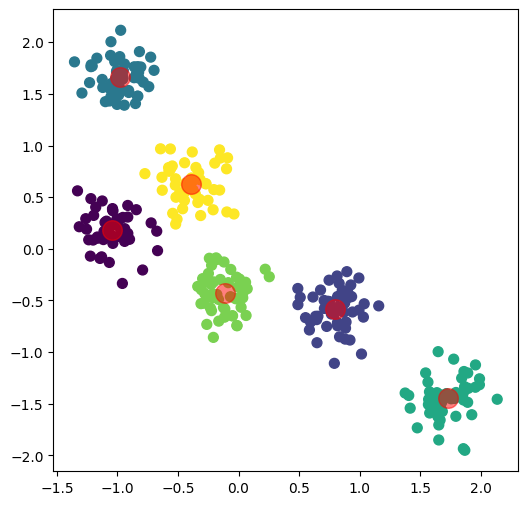

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

#plt.savefig('clusters.png', dpi=300, transparent=True)

In [13]:
model.inertia_

16.840104353258873

## Applying to Data

In [7]:
cat_model = KMeans(n_clusters=6, n_init = 10)

NameError: name 'KMeans' is not defined

In [15]:
cat_labels = cat_model.fit_predict(cat_samp)

In [16]:
cat_centroids = cat_model.cluster_centers_

In [17]:
cat_samp_columns

['ra',
 'dec',
 'f187n',
 'f182m',
 'f212n',
 'f405n',
 'f410m',
 'f466n',
 'f182m-f212n',
 'f182m-f410m',
 'f405n-f466n']

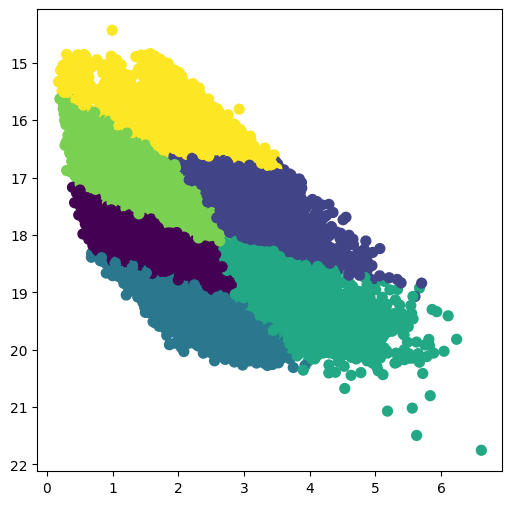

In [18]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, 3], c=cat_labels, s=50, cmap='viridis')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)

# Gaussian Mixture

In [4]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=6, n_init=10, random_state=0)
#model.fit(X)

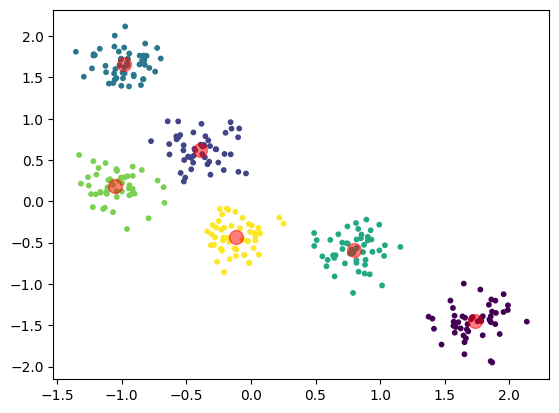

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=10, cmap='viridis')

plt.scatter(model.means_[:, 0], model.means_[:, 1], c='red', s=100, alpha=0.5)

## Applying to Data

In [ ]:
cat_model_nopos = GaussianMixture(n_components=10, n_init=20, random_state=0)
cat_model_nopos.fit(cat_samp_nopos)

GaussianMixture(n_components=10, n_init=20, random_state=0)

Text(0, 0.5, 'f182m')

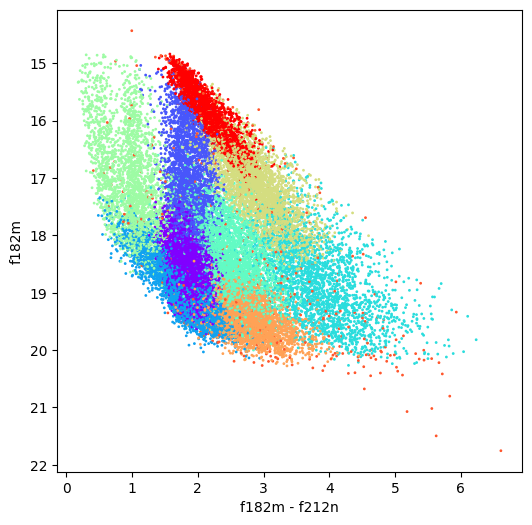

In [30]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp_nopos[:, 9-2], cat_samp_nopos[:, 3-2], c=cat_model_nopos.predict(cat_samp_nopos), s=1, cmap='rainbow')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f182m')

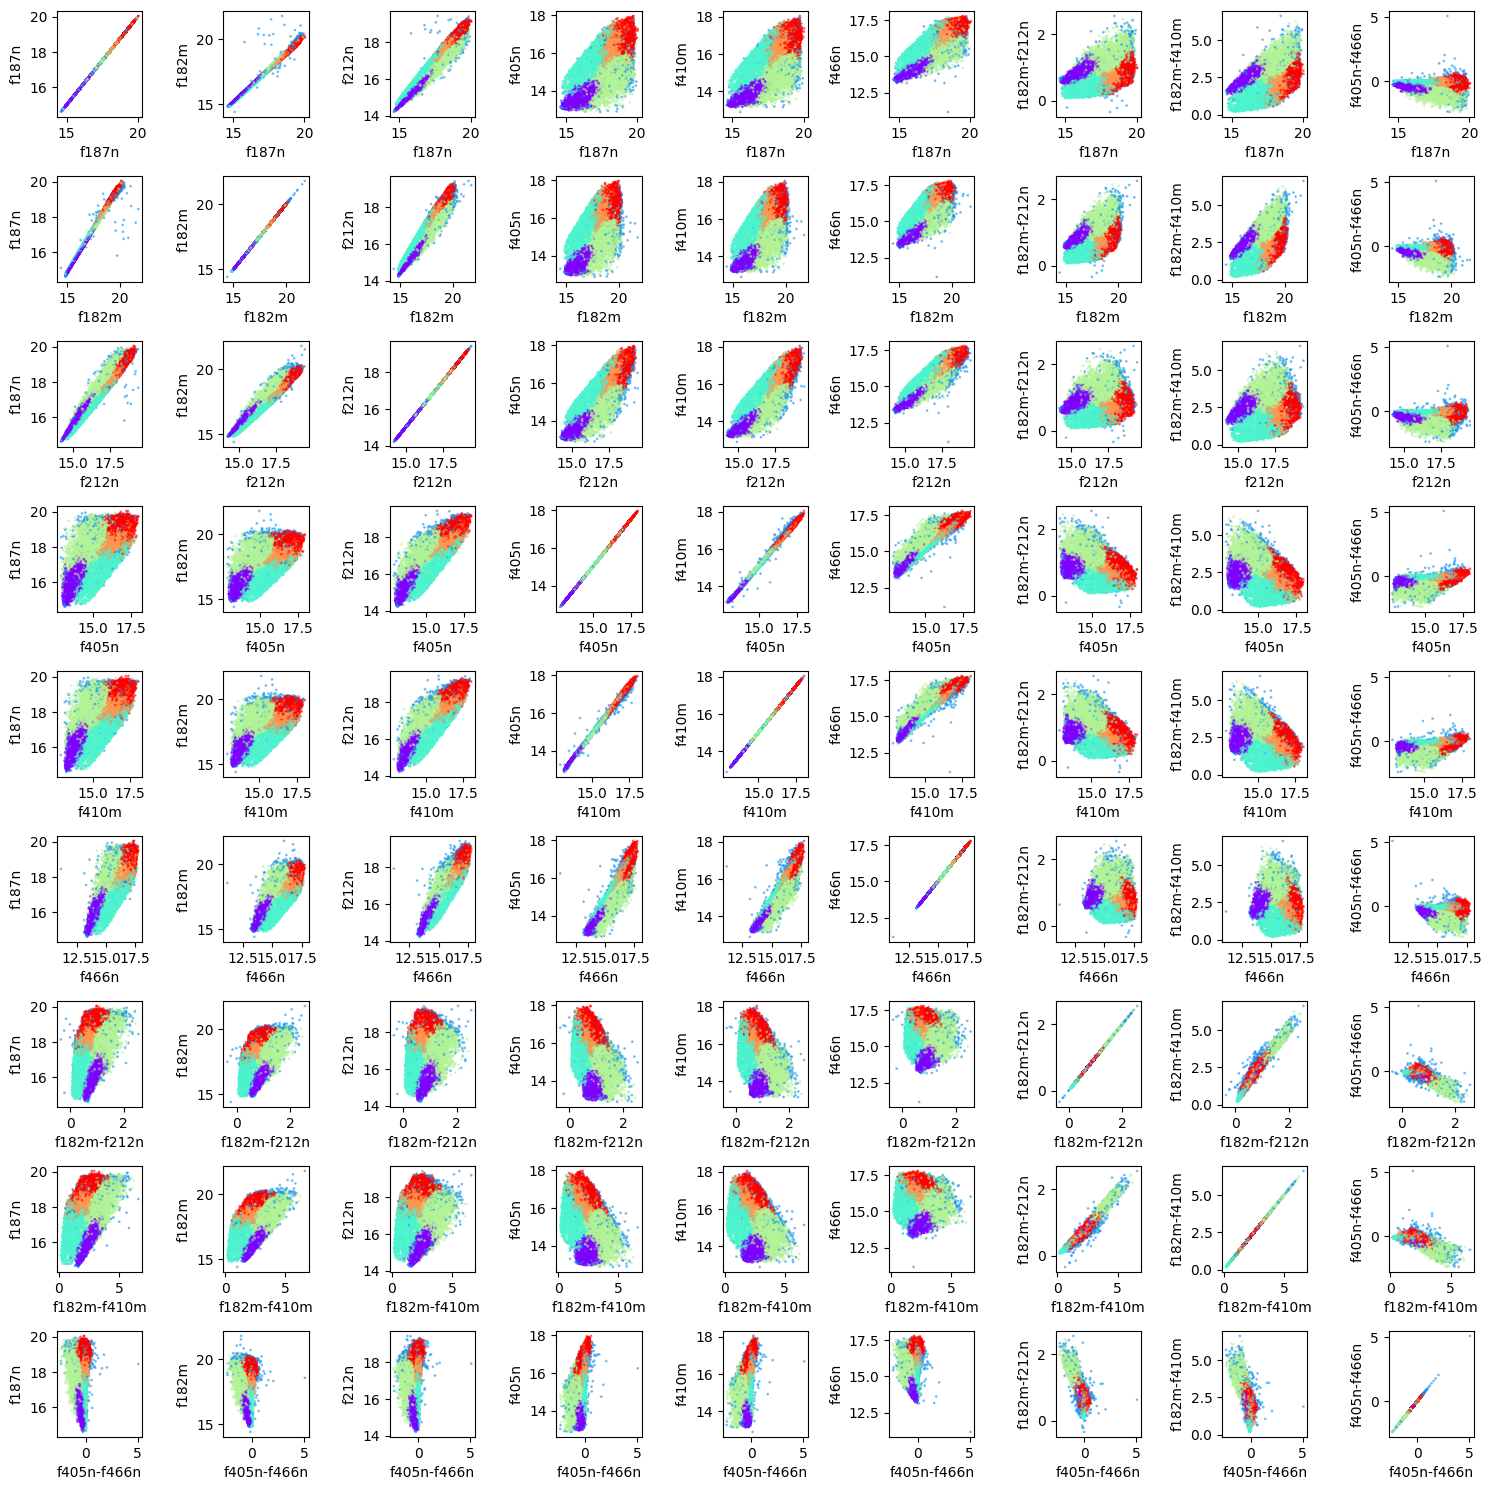

In [16]:
fig, axs = plt.subplots(len(cat_samp_columns_nopos), len(cat_samp_columns_nopos), figsize=(15, 15))
for i in range(len(cat_samp_columns_nopos)):
    for j in range(len(cat_samp_columns_nopos)):
        axs[i, j].scatter(cat_samp_nopos[:, i], cat_samp_nopos[:, j], s=1, alpha=0.5, c=cat_model_nopos.predict(cat_samp_nopos), cmap='rainbow')
        axs[i, j].set_xlabel(cat_samp_columns_nopos[i])
        axs[i, j].set_ylabel(cat_samp_columns_nopos[j])
plt.tight_layout()

In [5]:
cat_model_nopos = GaussianMixture(n_components=6, n_init=20, random_state=0)
cat_model_nopos.fit(cat_samp_nopos)

GaussianMixture(n_components=6, n_init=20, random_state=0)

Text(0, 0.5, 'f182m')

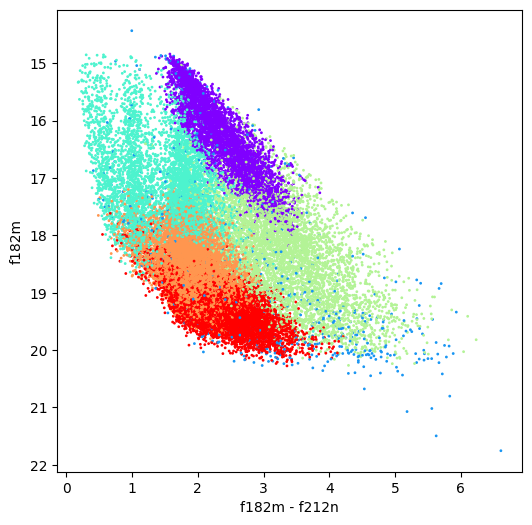

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp_nopos[:, 9-2], cat_samp_nopos[:, 3-2], c=cat_model_nopos.predict(cat_samp_nopos), s=1, cmap='rainbow')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f182m')

In [7]:
cat_model = GaussianMixture(n_components=6, n_init=20, random_state=0)
cat_model.fit(cat_samp)

GaussianMixture(n_components=6, n_init=20, random_state=0)

Text(0, 0.5, 'f182m')

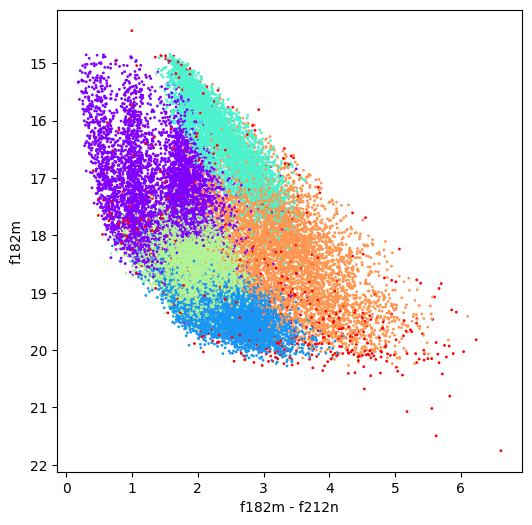

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, 3], c=cat_model.predict(cat_samp), s=1, cmap='rainbow')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f182m')

(-2.5, 1.0)

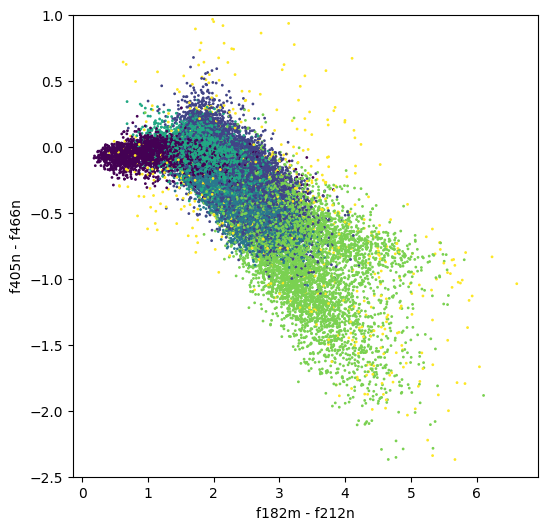

In [9]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, -1], c=cat_model.predict(cat_samp), s=1, cmap='viridis')

#plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f405n - f466n')
plt.ylim(-2.5, 1)

In [24]:
cat_model.predict(cat_samp)

array([5, 1, 0, ..., 0, 1, 5], shape=(34519,))

In [23]:
cat_model_nopos.predict(cat_samp_nopos)

array([1, 5, 2, ..., 2, 5, 1], shape=(34519,))

(-2.5, 1.0)

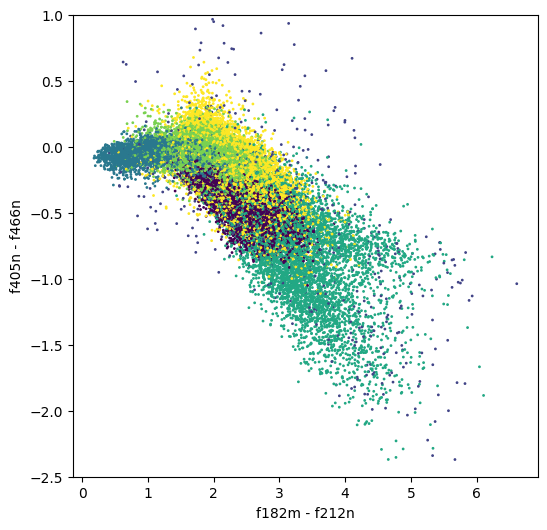

In [10]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp_nopos[:, 9-2], cat_samp_nopos[:, -1], c=cat_model_nopos.predict(cat_samp_nopos), s=1, cmap='viridis')

#plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f405n - f466n')
plt.ylim(-2.5, 1)

Text(0, 0.5, 'dec')

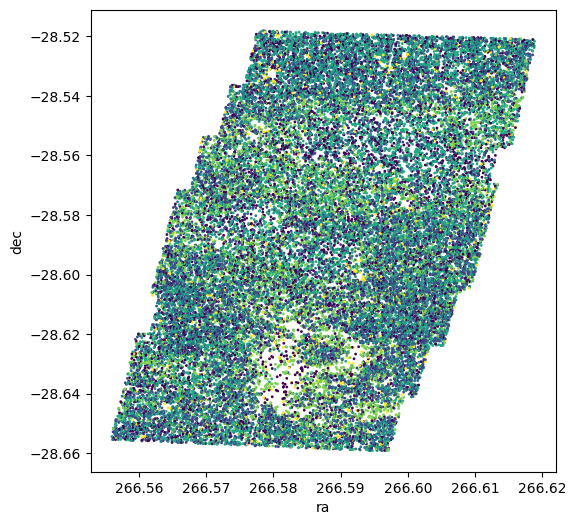

In [26]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 0], cat_samp[:, 1], c=cat_model.predict(cat_samp), s=1, cmap='viridis')

#plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('ra')
plt.ylabel('dec')

# Spectral Clustering

In [27]:
from sklearn.cluster import SpectralClustering


In [28]:
model = SpectralClustering(n_clusters=6, assign_labels='discretize', random_state=0)
model.fit(X)

SpectralClustering(assign_labels='discretize', n_clusters=6, random_state=0)

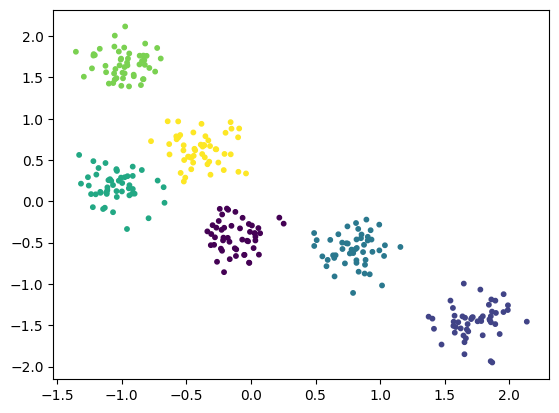

: 

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=10, cmap='viridis')

#plt.scatter(model.means_[:, 0], model.means_[:, 1], c='red', s=100, alpha=0.5)

## Applying to Data

In [ ]:
cat_model = SpectralClustering(n_clusters=6, assign_labels='discretize', random_state=0)
cat_model.fit(cat_samp)

Text(0, 0.5, 'f182m')

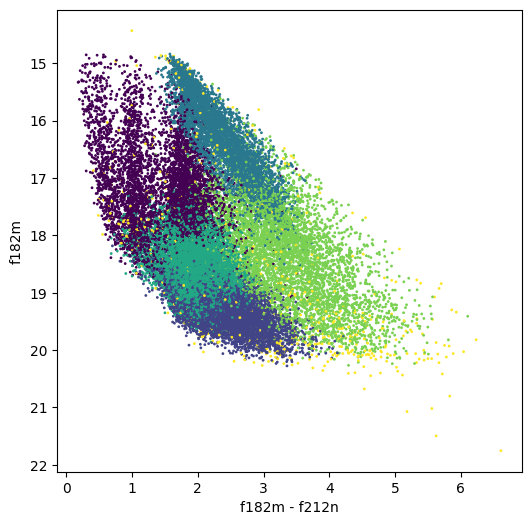

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
#ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
ax.scatter(cat_samp[:, 9], cat_samp[:, 3], c=cat_model.labels_, s=1, cmap='viridis')

plt.gca().invert_yaxis()
#plt.savefig('clusters.png', dpi=300, transparent=True)
plt.xlabel('f182m - f212n')
plt.ylabel('f182m')